<a href="https://colab.research.google.com/github/MarkAvilin1/DS-and-ML/blob/main/genre_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Задание Ultra pro**

модель для Распознания жанра. 

In [ ]:
from google.colab import files, drive
from tensorflow.keras.utils import to_categorical
import os
import librosa 
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
drive.mount('/content/driver')

Mounted at /content/driver


In [ ]:
!unzip -q '/content/driver/MyDrive/University AI/genres.zip'
genres = os.listdir('genres')

In [ ]:
def get_features(y, sr):
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) 
  mfcc = librosa.feature.mfcc(y=y, sr=sr)   
  rmse = np.mean(librosa.feature.rms(y=y)) 
  spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)) 
  spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)) 
  rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)) 
  zcr = np.mean(librosa.feature.zero_crossing_rate(y))
  
  out = [rmse, spec_cent, spec_bw, rolloff, zcr]

  for e in mfcc:
    out.append(np.mean(e))

  for e in chroma_stft:
    out.append(np.mean(e))
  rsl = np.array(out)
  return rsl

In [ ]:
X = []
Y = []

for i in range(len(genres)):
  g = genres[i]
  
  for filename in os.listdir(f'./genres/{g}'):
    songname = f'./genres/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    out = get_features(y, sr)
    X.append(out)
    Y.append(to_categorical(i, len(genres)))
  
X_train = np.array(X)
Y_train = np.array(Y)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(1000, 37)
(1000, 10)


In [ ]:
X_train_backup = X_train.copy()
Y_train_backup = Y_train.copy()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

y_train_class = np.argmax(Y_train, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_class, test_size=0.1)

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

call_back = LambdaCallback()

In [ ]:
indexes = range(37)

model = Sequential()
model.add(Dense(256, activation='elu', input_shape=(len(indexes),)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(genres), activation='softmax'))

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train[:, indexes],
                    y_train,
                    epochs=2000,
                    validation_data=(X_test[:, indexes], y_test),
                    callbacks=[call_back])

Epoch 1/2000
29/29 [==============================] - 1s 9ms/step - loss: 2.3108 - accuracy: 0.1122 - val_loss: 2.2412 - val_accuracy: 0.1500
Epoch 2/2000
29/29 [==============================] - 0s 4ms/step - loss: 2.2623 - accuracy: 0.1356 - val_loss: 2.2001 - val_accuracy: 0.1600
Epoch 3/2000
29/29 [==============================] - 0s 4ms/step - loss: 2.2446 - accuracy: 0.1389 - val_loss: 2.1475 - val_accuracy: 0.3000
Epoch 4/2000
29/29 [==============================] - 0s 4ms/step - loss: 2.1907 - accuracy: 0.1767 - val_loss: 2.1022 - val_accuracy: 0.3300
Epoch 5/2000
29/29 [==============================] - 0s 4ms/step - loss: 2.1349 - accuracy: 0.2378 - val_loss: 2.0560 - val_accuracy: 0.3300
Epoch 6/2000
29/29 [==============================] - 0s 4ms/step - loss: 2.1185 - accuracy: 0.2400 - val_loss: 2.0216 - val_accuracy: 0.3200
Epoch 7/2000
29/29 [==============================] - 0s 4ms/step - loss: 2.1000 - accuracy: 0.2311 - val_loss: 1.9875 - val_accuracy: 0.3200
Epoch 

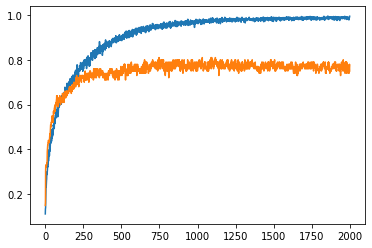

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
from random import randint
print(genres)
counter = 0
for genre in genres:
  for _ in range(3):
    i = randint(0, 9)
    songname = f'./genres/{genre}/{genre}.0000{i}.au'

    y, sr = librosa.load(songname, mono=True, duration=30)

    out = get_features(y, sr)

    out = np.array(out).reshape(1,37)

    out = scaler.transform(out)

    y = model.predict(out)

    nn = np.argmax(y)
    real = genres.index(genre)
    if nn == real:
      counter +=1

    print(f'The NN says {genres[nn]}, the real is => {genres[real]}')
print(f'The quality of NN is {int((counter / (len(genres) * 3)) * 100)} %')

['reggae', 'disco', 'hiphop', 'rock', 'blues', 'country', 'metal', 'jazz', 'classical', 'pop']
The NN says reggae, the real is => reggae
The NN says reggae, the real is => reggae
The NN says reggae, the real is => reggae
The NN says disco, the real is => disco
The NN says disco, the real is => disco
The NN says disco, the real is => disco
The NN says hiphop, the real is => hiphop
The NN says hiphop, the real is => hiphop
The NN says hiphop, the real is => hiphop
The NN says rock, the real is => rock
The NN says rock, the real is => rock
The NN says rock, the real is => rock
The NN says blues, the real is => blues
The NN says blues, the real is => blues
The NN says blues, the real is => blues
The NN says country, the real is => country
The NN says country, the real is => country
The NN says country, the real is => country
The NN says metal, the real is => metal
The NN says metal, the real is => metal
The NN says metal, the real is => metal
The NN says jazz, the real is => jazz
The NN sa